## 데이터 수집
#### 네이버 특정 키워드(이재명, 윤석열, 대통령) 뉴스기사를 beautifulsoup으로 크롤링을 진행했습니다.
#### Konlpy 안에 있는 Okt를 이용하여 명사를 추출하였습니다.
#### Okt가 많은 데이터를 처리하는데 소요 시간이 가장 짧기 때문에 사용하였습니다.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt

In [2]:
def find_keyword_news(search_word) :
    titles = []
    n = 1
    page_cnt = 0
    while(1) :
        if page_cnt == 5000 :
            break
        
        url = "https://m.search.naver.com/search.naver?where=m_news&sm=mtb_pge&query={search_word}&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=32&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all&start={num}"
        
        try :
            req = requests.get(url.format(search_word = search_word, num = n))
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
            search_result = soup.select_one('#news_result_list')
            news_links = search_result.select('.bx > .news_wrap > a')
            
            for title in news_links :
                titles.append(title.get_text())
            page_cnt += 1
        
        except :
            print('Finish!')
            break
        n += 15
    
    return titles

In [3]:
contents1 = find_keyword_news('이재명')
contents2 = find_keyword_news('윤석열')
contents3 = find_keyword_news('대통령')

In [4]:
print(len(contents1))
print(len(contents2))
print(len(contents3))

75000
75000
75000


### 이재명 후보 뉴스기사에서 명사를 추출하여 명사 단어별로 개수 확인

#### 이재명 뉴스기사에서 많이 나온 단어는 송영길, 중범죄, 산후조리원이 나오고 있습니다.
#### 송영길은 더불어 민주당 신임 당대표로 이재명 후보와 전략적 제휴 관계를 가지고 있는 모습을 보이고 있습니다. 최근 발목 수술을 받은 송영길 당대표의 휠체어를 끌어주며 공식석상에 모습을 비추는 등의 모습을 보여주고 있습니다.
#### 기획부동산이란 부동산을 이용해 경제적인 이익을 많이 얻을 수 있을 것처럼 조작하여 투자자들로부터 부당한 이득을 얻는 행위를 하는 중개업자나 업체를 의미한다. 최근 이재명 후보가 기획부동산을 중범죄라고 언급했습니다.
#### 산후조리원은 이재명 후보가 공공산후조리원을 전국으로 확대하고, 정부 지원을 강화하겠다고 발언했습니다.
#### 다른 키워드로는 디지털, 스마트, 재건축, 부동산 등은 이재명 후보의 대선 공약 키워드로 볼 수 있습니다.

In [5]:
noun_list_lee = []

okt = Okt()

for string in contents1 :
    noun_list_lee += [word for word in okt.nouns(string) if len(word) > 2 and word not in ('이재명', '윤석열')]

from collections import Counter

lee_nouns = Counter(noun_list_lee).most_common()

In [45]:
print(lee_nouns[:50])

[('코로나', 4773), ('송영길', 4757), ('중범죄', 4751), ('산후조리원', 4746), ('문재인', 4744), ('조계종', 4734), ('방명록', 4553), ('파생상품', 4462), ('부정부패', 4258), ('주가조작', 3676), ('부동산', 3088), ('그래픽', 3043), ('민주당', 3025), ('기아차', 3006), ('소하리', 2991), ('지지율', 2902), ('코스피', 2493), ('여론조사', 2014), ('가능성', 1931), ('대통령', 1430), ('도덕성', 1325), ('디지털', 1223), ('스마트', 1217), ('목소리', 1188), ('엄단해', 1187), ('이낙연', 275), ('안철수', 213), ('정세균', 132), ('기자회견', 100), ('대장동', 80), ('국민소득', 42), ('리얼미터', 38), ('김혜경', 37), ('인사말', 35), ('기재부', 33), ('기본소득', 33), ('김건희', 32), ('이해찬', 31), ('위원회', 31), ('취득세', 29), ('서비스', 28), ('지지자', 25), ('신년사', 25), ('김종인', 24), ('그린벨트', 23), ('거래소', 23), ('리서치', 22), ('압수수색', 21), ('메시지', 19), ('재건축', 19)]


### 윤석열 후보 뉴스기사에서 명사를 추출하여 명사 단어별로 개수 확인

#### 윤석열 뉴스기사에서는 김종인, 이준석, 김건희, 중범죄가 많이 등장합니다.
#### 김종인, 이준석은 같은 국민의 힘 소속으로 함께 선대위에 참여했지만 최근 서로간의 의견 충돌로 인하여 중도 하차했습니다.
#### 김건희는 윤석열 후보의 배우자로 최근 학력위조, 주가조작 연루 등의 많은 이슈로 인하여 키워드에 등장했습니다.
#### 중범죄 혐의에 휩싸인 후보가 진상규명 협조도 안하는데 토론을 어떻게 하냐는 발언으로 인해 키워드로 등장하게 되었습니다. 
#### 다른 키워드로는 디지털, 불평등, 중소기업 등이 나오는 것을 보아 윤석열 후보의 주 공약의 키워드로 볼 수 있습니다.

In [7]:
noun_list_yun = []

okt = Okt()

for string in contents2 :
    noun_list_yun += [word for word in okt.nouns(string) if len(word) > 2 and word not in ('이재명', '윤석열')]

from collections import Counter

yun_nouns = Counter(noun_list_yun).most_common()

In [46]:
print(yun_nouns[:50])

[('김종인', 6584), ('지지율', 6215), ('이준석', 6208), ('불기소', 5171), ('무혐의', 4745), ('윤대진', 4735), ('박근혜', 4700), ('조선일보', 3781), ('스스로', 3766), ('여론조사', 3562), ('비상조치', 3321), ('캠페인', 3297), ('현수막', 2827), ('진중권', 2564), ('중범죄', 2556), ('파생상품', 2391), ('코로나', 1924), ('음식점', 1911), ('압수수색', 1061), ('양극화', 1048), ('참여연대', 1045), ('불평등', 1045), ('리얼미터', 985), ('코스피', 557), ('기자회견', 545), ('민주당', 483), ('위원장', 461), ('안철수', 293), ('권영세', 120), ('김건희', 119), ('본부장', 117), ('홍준표', 70), ('박형준', 69), ('중소기업', 67), ('오세훈', 66), ('신년인사', 47), ('대통령', 44), ('권성동', 36), ('메시지', 32), ('디지털', 31), ('가능성', 29), ('김한길', 29), ('이낙연', 28), ('플랫폼', 27), ('김부겸', 25), ('임대료', 25), ('리서치', 24), ('선거운동', 23), ('매머드', 22), ('인터뷰', 22)]


### 대통령 뉴스기사에서 명사를 추출하여 명사 단어별로 개수 확인

#### 대통령에는 박근혜, 병원, 코로나, 표창  등이 많이 등장합니다.
#### 박근헤 전 대통령은 최근에 사면을 받고 바로 병원으로 이동하여 키워드로 함께 등장했습니다.
#### 코로나는 현재 가장 핫한 이슈로 관련 정책으로 인해 많이 등장한 키워드입니다. 
#### 표창은 최근 대통령 표창 수상 관련으로 인해 키워드로 등장했습니다.
#### 벤처기업, 금융, 일자리, 청년 등 대통령으로서 강조되어지는 단어들이 많이 등장함을 알 수 있습니다.

In [9]:
noun_list_pre = []

okt = Okt()

for string in contents3 :
    noun_list_pre += [word for word in okt.nouns(string) if len(word) >= 2 and word not in ('대통령')]
    
from collections import Counter

pre_nouns = Counter(noun_list_pre).most_common()

In [47]:
print(pre_nouns[:50])

[('박근혜', 12739), ('병원', 10385), ('사면', 9797), ('표창', 9640), ('코로나', 9544), ('광역', 9480), ('방문', 8659), ('바이든', 6750), ('병상', 5631), ('확보', 5619), ('집중', 5605), ('국립대', 5595), ('수상', 4867), ('위기', 4825), ('학교', 4813), ('총수', 4813), ('오늘', 4812), ('특수', 4809), ('오찬', 4799), ('지원', 4797), ('회복', 4797), ('청년', 4789), ('대기업', 4789), ('일자리', 4785), ('정상화', 4777), ('설립', 4776), ('협력', 4766), ('간담', 4766), ('내년', 4764), ('일상', 4761), ('전격', 4756), ('필요', 4755), ('지속', 4755), ('박범계', 4753), ('공주대', 4752), ('부설', 4752), ('제외', 4751), ('논의', 4748), ('산업', 4748), ('이명박', 4748), ('거점', 4747), ('금융', 4747), ('농협', 4746), ('은행', 4746), ('중소', 4746), ('벤처기업', 4746), ('회하', 4744), ('오바마', 4744), ('절실', 4744), ('트럼프', 4743)]


### 이재명 후보 관련 명사 단어 구름

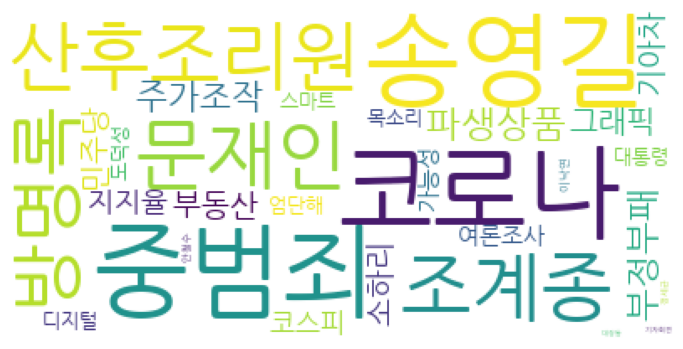

In [11]:
from wordcloud import WordCloud

path = r'C:\Users\gkscj\Desktop\CodingTest\nanum-all\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'

wc = WordCloud(font_path = path, background_color = 'white', max_font_size = 60)

cloud = wc.generate_from_frequencies(dict(lee_nouns))

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'NanumBarunGothic')
plt.figure(figsize = (12, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 윤석열 후보 관련 명사 단어 구름

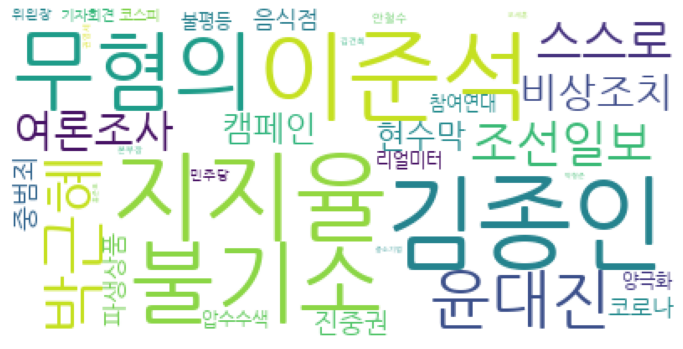

In [12]:
from wordcloud import WordCloud

path = r'C:\Users\gkscj\Desktop\CodingTest\nanum-all\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'

wc = WordCloud(font_path = path, background_color = 'white', max_font_size = 60)

cloud = wc.generate_from_frequencies(dict(yun_nouns))

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'NanumBarunGothic')
plt.figure(figsize = (12, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 대통령 관련 명사 단어 구름

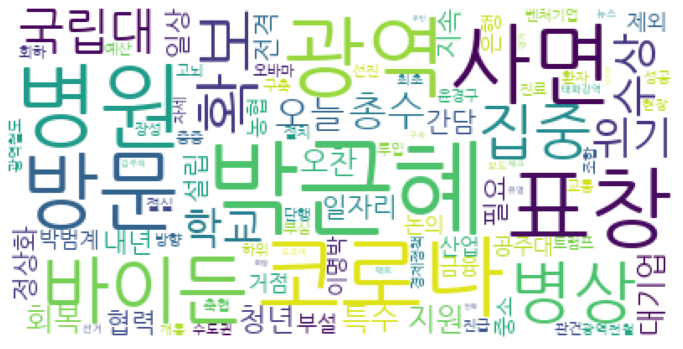

In [13]:
from wordcloud import WordCloud

path = r'C:\Users\gkscj\Desktop\CodingTest\nanum-all\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'

wc = WordCloud(font_path = path, background_color = 'white', max_font_size = 60)

cloud = wc.generate_from_frequencies(dict(pre_nouns))

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'NanumBarunGothic')
plt.figure(figsize = (12, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 대통령과 각각의 대선 후보의 명사 키워드

#### 대통령과 각각의 대선 후보인 이재명과 윤석열의 단어와 갯수를 딕셔너리 형식으로 변경했습니다.
#### 변경한 딕셔너리 형태에서 Key만을 담아 명사 키워드만 가지고 있는 리스트를 만들었습니다.

In [14]:
pre_dict = dict(pre_nouns)
lee_dict = dict(lee_nouns)
yun_dict = dict(yun_nouns)

In [15]:
pre_keys_list = list(pre_dict.keys())
lee_keys_list = list(lee_dict.keys())
yun_keys_list = list(yun_dict.keys())

### 대통령 명사 키워드

#### 대통령 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 명사는 2글자 이상이 일반적이라 생각했습니다.
#### 박근혜, 병원, 사면, 표창의 키워드가 보이고 있습니다.
#### 박근혜 전 대통령이 사면 후 병원으로 이동하여 키워드로 등장했습니다.
#### 최근 대통령 표창 수상관련 뉴스 키워드로 등장하고 있습니다.

In [48]:
pre_key_list_2 = []
for key in pre_dict.keys() :
    if pre_dict[key] >= 2 :
        pre_key_list_2.append(key)
print(pre_key_list_2[:50])

['박근혜', '병원', '사면', '표창', '코로나', '광역', '방문', '바이든', '병상', '확보', '집중', '국립대', '수상', '위기', '학교', '총수', '오늘', '특수', '오찬', '지원', '회복', '청년', '대기업', '일자리', '정상화', '설립', '협력', '간담', '내년', '일상', '전격', '필요', '지속', '박범계', '공주대', '부설', '제외', '논의', '산업', '이명박', '거점', '금융', '농협', '은행', '중소', '벤처기업', '회하', '오바마', '절실', '트럼프']


### 이재명 후보 명사 키워드

#### 이재명 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 명사는 2글자 이상이 일반적이라 생각했습니다.
#### 송영길, 중범죄, 산후조리원, 방명록, 파생상품 등이 키워드로 나타나고 있습니다.
#### 송영길은 더불어 민주당 신임 당대표로 이재명 후보와 전략적 제휴 관계를 가지고 있는 모습을 보이고 있습니다.
#### 중범죄는 기획부동산에 대해 언급하며 나타난 키워드입니다.
#### 산후조리원은 지원 정책으로 인해 나타나고 있습니다.
#### 이재명 후보가 최근 2022년 증권·파생상품시장 개장식에 참여하여 방명록을 작성하여 함께 나타나고 있습니다.

In [49]:
lee_key_list_2 = []
for key in lee_dict.keys() :
    if lee_dict[key] >= 2 :
        lee_key_list_2.append(key)
print(lee_key_list_2[:50])

['코로나', '송영길', '중범죄', '산후조리원', '문재인', '조계종', '방명록', '파생상품', '부정부패', '주가조작', '부동산', '그래픽', '민주당', '기아차', '소하리', '지지율', '코스피', '여론조사', '가능성', '대통령', '도덕성', '디지털', '스마트', '목소리', '엄단해', '이낙연', '안철수', '정세균', '기자회견', '대장동', '국민소득', '리얼미터', '김혜경', '인사말', '기재부', '기본소득', '김건희', '이해찬', '위원회', '취득세', '서비스', '지지자', '신년사', '김종인', '그린벨트', '거래소', '리서치', '압수수색', '메시지', '재건축']


### 윤석열 후보 명사 키워드

#### 윤석열 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 명사는 2글자 이상이 일반적이라 생각했습니다.
#### 불기소, 무혐의, 박근혜 등이 키워드로 나타나고 있습니다.
#### 검찰이 청탁금지법상 ‘공직자의 배우자’에 대한 처벌 조항이 없다는 이유로, 윤석열 국민의힘 대선후보 배우자 김건희 씨의 ‘코바나컨텐츠 불법 협찬’ 혐의에 대해 무혐의 처분한 것으로 알려져 불기소 처분하여 함께 나타났습니다.
#### 박근혜 전 대통령이 사면되면서 윤석열 후보에 대한 언급 유무로 인해 키워드로 등장했습니다.

In [50]:
yun_key_list_2 = []
for key in yun_dict.keys() :
    if yun_dict[key] >= 2 :
        yun_key_list_2.append(key)
print(yun_key_list_2[:50])

['김종인', '지지율', '이준석', '불기소', '무혐의', '윤대진', '박근혜', '조선일보', '스스로', '여론조사', '비상조치', '캠페인', '현수막', '진중권', '중범죄', '파생상품', '코로나', '음식점', '압수수색', '양극화', '참여연대', '불평등', '리얼미터', '코스피', '기자회견', '민주당', '위원장', '안철수', '권영세', '김건희', '본부장', '홍준표', '박형준', '중소기업', '오세훈', '신년인사', '대통령', '권성동', '메시지', '디지털', '가능성', '김한길', '이낙연', '플랫폼', '김부겸', '임대료', '리서치', '선거운동', '매머드', '인터뷰']


### 대통령과 각 후보 명사 키워드의 공통 명사

#### 대통령, 이재명 후보, 윤석열 후보 세 개의 관련 키워드에서의 공통적으로 나타나는 명사를 확인해보고자 추출했습니다.
#### 현재 가장 큰 문제인 부동산 문제로 인해 이재명, 윤석열 두 후보의 정책과 대통령으로서 해결해야할 책임으로 인해 키워드로 등장했습니다.
#### 마찬가지로 중소기업, 코스피, 국민소득, 일자리도 정책 공약으로 인해 함께 나타났습니다.
#### 제 20대 대통령선거가 100일도 남지 않았기에 후보자, 지지율, 대통령선거, 리얼미터 등이 보이고 있습니다.
#### 리얼미터란 정치분야 여론조사 전문업체로 여론조사 결과가 기사화 되고 있기에 나왔습니다.
#### 정세균은 전 국무총리로서 이재명 후보의 후원회장으로 이재명 후보를 지지하고 있습니다.
#### 문재인 대통령과 각 후보의 2022년 임인년 신년사도 키워드로 등장하고 있습니다.

In [51]:
intersect = set(pre_keys_list) & set(yun_keys_list) & set(lee_keys_list)

In [52]:
intersect = list(intersect)
print(len(intersect))
print(intersect)

105
['중소기업', '리얼미터', '부동산', '아바타', '대부분', '박영선', '여론조사', '정세균', '뉴시스', '가능성', '불가능', '김두관', '인터뷰', '충청권', '서비스', '온라인', '추격자', '기자회견', '리스크', '김종인', '지지율', '이야기', '지난주', '이준석', '스스로', '박형준', '마스크', '코스피', '후보자', '반드시', '네거티브', '문재인', '신년사', '수도권', '정상화', '방명록', '지지자', '위원장', '메시지', '추미애', '디지털', '배우자', '도덕성', '양극화', '불평등', '변호사', '그래픽', '대국민', '사진관', '줄줄이', '김현철', '국립현충원', '이미지', '호랑이', '대한민국', '국립서울현충원', '대통령선거', '코로나', '포인트', '지지도', '장애인', '송영길', '거짓말', '임인년', '김기현', '지난해', '윤핵관', '거래소', '지방선거', '신년인사', '위원회', '안철수', '쓴소리', '나경원', '부울경', '캠페인', '심상정', '킹메이커', '포커스', '시스템', '마지막', '한마디', '활성화', '인사말', '현충원', '에너지', '경제성장', '본부장', '라이브', '공무원', '국민의례', '윤호중', '글로벌', '정치인', '박근혜', '김건희', '검찰총장', '프로젝트', '국민소득', '브리핑', '일자리', '민주당', '이수정', '김동연', '홍준표']


### 이재명 후보와 윤석열 후보에게 나타나는 공통 명사

#### 이재명, 윤석열의 관련 키워드에서 대통령 관련 키워드를 제외하고 공통적으로 나타나는 명사를 확인해보고자 추출했습니다.
#### 두 후보 모두 균형발전, 전기차 관련 정책을 내세우고 있습니다.
#### 2022년에 열리는 베이징 올림픽의 보이콧에 대해서도 이야기가 많이 나오고 있습니다.
#### 대선을 앞두고 있기에 투표 독려를 위해 해외동포와 같은 키워드도 나타나고 있습니다.
#### 2022년 임인년을 맞이하여 두 후보 모두 신년사를 하여 새해인사 키워드도 보이고 있습니다.

In [55]:
print((set(lee_keys_list) & set(pre_key_list_2)) - set(intersect))

{'미디어', '생중계', '청와대', '다당제', '민간인', '최대한', '농업인', '전두환', '농어촌', '베이징올림픽', '당분간', '해외동포', '오히려', '기념관', '기재부', '세리머니', '양산시', '전기차', '안평환', '게시판', '성폭력', '이명박', '자전거', '박수현', '막바지', '균형발전', '참석자', '감염병', '손학규', '국민주권', '한반도', '책임감', '그대로', '물금역', '반려견', '바이든', '관계자', '윤미향', '지역화폐', '전남도', '대기업', '만들기', '인터넷', '박정희', '가처분', '그리움', '특별법', '노무현', '청소년', '시진핑', '민주주의', '공공기관', '유라시아', '퍼부은', '경기도', '새해인사', '정치권', '출발점', '불균형', '누리꾼', '김혜경', '총력전'}


### 윤석열 후보에게만 나타나는 명사

#### 윤석열 관련 명사 키워드에서 이재명 관련 명사 키워드를 제거했습니다.
#### 김병준은 윤석열 선거대책위원회의 상임선대위원장은로 최근 국민의힘 선거 대책 위원회 해체 사태로 인해 키워드로 등장했습니다.
#### 윤석열 후보가 경상북도 안동에 위치한 도산서원에 방문하여 퇴계 이황 선생 참배를 하여 키워드로 등장했습니다.
#### 윤석열 후보와 현재 트러블이 있는 이준석 당대표의 자진사퇴 압박 때문에 관련 키워드로 등장하고 있습니다.
#### 최근 지하철 9호선을 타고 출근하여  출근길이라는 키워드도 보이고 있습니다.
#### 이준석 국민의 힘 당대표가 윤석열 후보에게 발언한 개썰매라는 단어로 인해 키워드로 등장하고 있습니다.

In [56]:
yun_keys_only = set(yun_key_list_2) - set(lee_key_list_2)

In [57]:
yun_keys_only = list(yun_keys_only)
print(yun_keys_only[:50])

['김병준', '중소기업', '도산서원', '싱크탱크', '자충수', '그래프', '우상호', '아바타', '진행형', '가이드라인', '크라켄', '가까이', '기득권', '꼭두각시', '현수막', '미지수', '원희룡', '윤대진', '조성은', '쿠데타', '자진사퇴', '피의자', '재출발', '결별설', '무혐의', '대책위', '곤두박질', '서초동', '참여연대', '장기표', '무자격', '안갯속', '정태근', '대수술', '음식점', '승강기', '곧바로', '언론인', '문성근', '우물쭈물', '서울시장', '에이치', '출근길', '난파선', '일문일답', '공과금', '공직자', '시험대', '개썰매', '박형준']


### 이재명 후보에게만 나타나는 명사

#### 이재명 관련 명사 키워드에서 윤석열 관련 명사 키워드를 제거했습니다.
#### 김용민 평화나무 이사장이 이재명 후보의 마타도어의 주인공이라는 발언을 하며 배후 스폰서 의혹을 내세웠습니다.
#### 마타도어란 출처를 위장하거나 밝히지 않는 선전으로 흑색선전이라고 합니다.
#### 최근 이재명 후보가 전라남도 담양군에 위치한 담양 에코센터 호남기후변화체험관에서 태양광 발전시스템에 대해 설명을 들었다는 기사들이 올라와 키워드로 등장했습니다.
#### 이재명 후보에게 손해배상 청구 소송을 제기한 배우 김부선이 재판에서 진료기록을 믿을 수 없다며 아주대병원 의료진의 증인 출석 요구하여 키워드로 등장했습니다. 

In [26]:
lee_keys_only = set(lee_key_list_2) - set(yun_key_list_2)

In [58]:
lee_keys_only = list(lee_keys_only)
print(lee_keys_only[:50])

['스폰서', '비정규직', '소하리', '신체감정', '강기정', '수출입', '뒤집혔다', '혁신단', '우리나라', '산후조리원', '서점가', '상반기', '메트로', '전두환', '태양광', '불공정', '진료기록', '대부분', '추경안', '취득세', '수술실', '주가지수', '경제성', '김진태', '정세균', '통도사', '커뮤니티', '씨리얼', '어르신', '경인선', '손학규', '국민주권', '책임감', '나꼼수', '국민연금', '기후변화', '실용주의', '정치화', '마무리', '전남도', '무관용', '보고서', '순국선열', '보호수', '지하철', '재산세', '학자금', '대법관', '삼국지', '김문기']


### 이재명 후보와 대통령의 공통 명사 키워드

#### 이재명과 대통령의 관련 키워드 중 공통 명사 키워드를 확인했습니다.
#### 대통령 관련 키워드와 이재명 관련 키워드의 가장 큰 접점은 코로나 감염병 이야기입니다.
#### 최근 사면한 박근혜 전 대통령도 키워드로 등장하고 있습니다.
#### 이재명 후보가 공약으로 내세우고 있는 부동산, 일자리도 키워드도 관련 키워드로 등장하고 있습니다.

In [59]:
cnt = 0
lee_key_list1_all = []

for key in pre_keys_list :
    if key in lee_keys_list :
        cnt += 1
        lee_key_list1_all.append(key)
print(cnt)
print(lee_key_list1_all[:50])

186
['박근혜', '코로나', '바이든', '대기업', '일자리', '정상화', '이명박', '수도권', '대통령선거', '지지율', '여론조사', '문재인', '신년사', '마지막', '송영길', '신년인사', '현충원', '민주당', '메시지', '김종인', '이준석', '심상정', '지지자', '호랑이', '임인년', '김건희', '정세균', '노무현', '반드시', '당분간', '특별법', '대한민국', '부동산', '인사말', '공무원', '민주주의', '안철수', '청와대', '국립서울현충원', '한반도', '장애인', '위원장', '위원회', '감염병', '대국민', '경기도', '유라시아', '뉴시스', '관계자', '가처분']


### 윤석열 후보와 대통령의 공통 명사 키워드

#### 윤석열과 대통령의 관련 키워드 중 공통 명사 키워드를 확인했습니다.
#### 이재명 후보와 마찬가지로 최근 사면한 박근혜 전 대통령이 키워드로 등장하고 있습니다.
#### 현재 윤석열 후보 여론조사 결과가 떨어지고 있어 추격자, 지지율, 여론조사와 같은 키워드도 나타나고 있습니다.
#### 윤석열 후보가 공약으로 내세우고 있는 디지털, 부동산도 관련 키워드로 나타나고 있습니다.

In [61]:
cnt = 0
yun_key_list1_all = []

for key in pre_keys_list :
    if key in yun_keys_list :
        cnt += 1
        yun_key_list1_all.append(key)
print(cnt)
print(yun_key_list1_all[:50])

148
['박근혜', '코로나', '일자리', '정상화', '수도권', '대통령선거', '지지율', '여론조사', '문재인', '신년사', '마지막', '송영길', '신년인사', '현충원', '민주당', '메시지', '김종인', '이준석', '심상정', '지지자', '호랑이', '임인년', '김건희', '정세균', '반드시', '대한민국', '부동산', '인사말', '공무원', '안철수', '국립서울현충원', '장애인', '위원장', '현수막', '위원회', '어려움', '대국민', '뉴시스', '추미애', '가능성', '양극화', '디지털', '활성화', '추격자', '김기현', '방명록', '이수정', '변호사', '국민소득', '기자회견']


### 감성 사전 분석

#### 감성 분석(Sentiment Analysis)이란 텍스트에 들어있는 의견이나 감성, 평가, 태도 등의 주관적인 정보를 컴퓨터를 통해 분석하는 과정입니다.
#### 감성 사전 분석은 아래 4가지 소스를 통해 개발되었습니다.
#### (1) 국립국어원 표준국어대사전의 뜻풀이 분석을 통한 긍부정 추출
#### (2) 김은영의 긍부정어 목록
#### (3) SentiWordNet 및 SenticNet-5.0에서 주로 사용되는 긍부정어 번역
#### (4) 최근 온라인에서 많이 사용되는 축약어 및 긍부정 이모티콘 목록

#### 이것을 통해 이루어진 JSON 파일을 불러와서 사용할 것입니다.
#### 긍정/부정은 매우긍정, 긍정, 중립, 부정, 매우부정 총 5가지로 나누어져 있습니다.

In [32]:
import json

class KnuSL():
    def data_list(self, wordname):	
        with open('senti_data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
            data = json.load(f)
#             print(data)
        result = ['None','None']	
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        r_word = result[0]
        s_word = result[1]
#         print('어근 : ' + r_word)
#         print('극성 : ' + s_word)
        return s_word

### 윤석열 후보 관련 명사 키워드 긍정/부정 판별

#### 전체 명사 키워드 리스트를 이용하여 판별했습니다.
#### 3글자 이상의 단어의 뜻이 모호해서 판별을 못할 수도 있기에 2글자 단어로 확인도 가능할 수 있도록 했습니다.
#### 윤석열 후보 관련 명사에 대한 긍정/부정 판별 결과는 아래와 같이 나타났습니다.
#### 매우긍정 : 1, 긍정 : 8, 중립 : 0, 부정 : 7, 매우부정 : 10

In [33]:
cnt_dict_yun = {'very_pos':0,
                  'pos':0,
                  'neu':0,
                  'neg':0,
                  'very_neg':0
                 }

ksl = KnuSL()

for wordname in yun_keys_list:
    wordname = wordname.strip(" ")
    result = ksl.data_list(wordname)
#     print("result:",result)
    if result == '2' :
        cnt_dict_yun['very_pos'] += 1
    elif result == '1' :
        cnt_dict_yun['pos'] += 1
    elif result == '0' :
        cnt_dict_yun['neu'] += 1
    elif result == '-1' :
        cnt_dict_yun['neg'] += 1
    elif result == '-2' :
        cnt_dict_yun['very_neg'] += 1
    elif result == 'None' :
        sub_word = wordname[:2]
#         print("sub_word_result:",ksl.data_list(sub_word))
        sub_word_result = ksl.data_list(sub_word)
        if sub_word_result == '2' :
            cnt_dict_yun['very_pos'] += 1
        elif sub_word_result == '1' :
            cnt_dict_yun['pos'] += 1
        elif sub_word_result == '0' :
            cnt_dict_yun['neu'] += 1
        elif sub_word_result == '-1' :
            cnt_dict_yun['neg'] += 1
        elif sub_word_result == '-2' :
            cnt_dict_yun['very_neg'] += 1
#     print(cnt_dict_lee)
print(cnt_dict_yun)

{'very_pos': 1, 'pos': 8, 'neu': 0, 'neg': 7, 'very_neg': 10}


### 이재명 후보 관련 명사 키워드 긍정/부정 판별

#### 전체 명사 키워드 리스트를 이용하여 판별했습니다.
#### 3글자 이상의 단어의 뜻이 모호해서 판별을 못할 수도 있기에 2글자 단어로 확인도 가능할 수 있도록 했습니다.
#### 이재명 후보 관련 명사에 대한 긍정/부정 판별 결과는 아래와 같이 나타났습니다.
#### 매우긍정 : 3, 긍정 : 10, 중립 : 0, 부정 : 8, 매우부정 : 11

In [34]:
cnt_dict_lee = {'very_pos':0,
                  'pos':0,
                  'neu':0,
                  'neg':0,
                  'very_neg':0
                 }

ksl = KnuSL()

for wordname in lee_keys_list:
    wordname = wordname.strip(" ")
    result = ksl.data_list(wordname)
#     print("result:",result)
    if result == '2' :
        cnt_dict_lee['very_pos'] += 1
    elif result == '1' :
        cnt_dict_lee['pos'] += 1
    elif result == '0' :
        cnt_dict_lee['neu'] += 1
    elif result == '-1' :
        cnt_dict_lee['neg'] += 1
    elif result == '-2' :
        cnt_dict_lee['very_neg'] += 1
    elif result == 'None' :
        sub_word = wordname[:2]
#         print("sub_word_result:",ksl.data_list(sub_word))
        sub_word_result = ksl.data_list(sub_word)
        if sub_word_result == '2' :
            cnt_dict_lee['very_pos'] += 1
        elif sub_word_result == '1' :
            cnt_dict_lee['pos'] += 1
        elif sub_word_result == '0' :
            cnt_dict_lee['neu'] += 1
        elif sub_word_result == '-1' :
            cnt_dict_lee['neg'] += 1
        elif sub_word_result == '-2' :
            cnt_dict_lee['very_neg'] += 1
#     print(cnt_dict_lee)
print(cnt_dict_lee)

{'very_pos': 3, 'pos': 10, 'neu': 0, 'neg': 8, 'very_neg': 11}


#### 매우긍정, 긍정, 부정, 매우부정 모두 이재명 후보가 더 많이 나타나고 있습니다.
#### 매우긍정 + 긍정 / 중립 / 부정 + 매우부정으로 비교를 해보자면
#### 윤석열 후보는 매우긍정 + 긍정 : 9 / 중립 : 0 / 부정 + 매우부정 : 17
#### 이재명 후보는 매우긍정 + 긍정 : 13 / 중립 : 0 / 부정 + 매우부정 : 19
#### 단순 결과를 비교한 것과 마찬가지로 긍정과 부정을 더해서 비교 해도 이재명 후보가 긍정/부정 명사가 더 많이 나타나고 있다는 것을 볼 수 있습니다.

#### 명사의 부정과 긍정 갯수가 생각보다 적어서 명사보다 동사에 부정과 긍정이 담겨있다고 생각했습니다.
#### 그래서 동사로 추출하여 비교해보기로 했습니다.
#### 동사는 명사와 다르게 추출한 내용을 통해 무언가를 예측하거나 추측해보기는 어렵습니다.
#### 그렇기 때문에 추출한 내용을 확인한 뒤 바로 감성분석사전을 통해 결과를 도출하기로 했습니다.

### 이재명 뉴스기사에서 동사를 추출하여 동사별로 개수 확인

#### 이재명 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 동사는 2글자 이상이 일반적이라 생각했습니다.
#### 가장 많이 등장한 동사는 하는, 굳히기, 오른건, 드러나 등과 같은 동사가 가장 많이 등장했습니다.

In [63]:
lee_verb_list_1 = []
okt = Okt()
for string in contents1 :
    for word in okt.pos(string) :
        if word[1] == 'Verb' :
            if len(word[0]) >= 2 :
                lee_verb_list_1.append(word[0])
print(len(lee_verb_list_1))
print(lee_verb_list_1[:50])
from collections import Counter
lee_verb_list_1_most = Counter(lee_verb_list_1).most_common()

51446
['하는', '않겠다', '낮출', '잃은', '만들겠다', '심는다', '난다', '되나', '하자는건', '아냐', '남기지', '않아도', '심는다', '주는', '믿어', '심는다', '올라온', '쳐진', '심는', '겁니다', '올린', '보니', '듣는다', '꺼냈다', '걷는', '비전', '뽑는다', '심는다', '잡아', '심는다', '줄길래', '잡은', '했을지도', '믿을', '믿는다', '해내겠다', '심는다', '아냐', '하길', '하더니', '하는', '된다', '이길', '긋기', '심은', '보란', '손잡고', '비전', '터졌다', '달릴까']


In [64]:
print(lee_verb_list_1_most[:50])

[('하는', 7998), ('굳히기', 5683), ('오른건', 4736), ('드러나', 4735), ('타기', 4735), ('쉽지', 4259), ('해보니', 4257), ('않더라', 4257), ('찾아', 2998), ('더불어', 2931), ('내세워', 2478), ('비전', 70), ('해야', 68), ('찾은', 54), ('아냐', 42), ('하면', 42), ('이길', 40), ('넘어', 35), ('되겠다', 33), ('열겠다', 32), ('나누는', 29), ('심는다', 28), ('치는', 28), ('하겠다', 26), ('잡은', 24), ('만들어', 24), ('보란', 21), ('인당', 21), ('내린', 19), ('감면', 19), ('했다', 17), ('돼야', 17), ('받겠다', 15), ('듣는', 15), ('나를', 15), ('심는', 14), ('하자', 14), ('이어', 14), ('쏟겠다', 14), ('앞섰다', 13), ('한다', 13), ('받는', 12), ('겁니다', 11), ('꺼낸', 11), ('살펴보는', 11), ('긋기', 10), ('손잡고', 10), ('해도', 10), ('해주길', 10), ('만들', 10)]


### 윤석열 뉴스기사에서 동사를 추출하여 동사별로 개수 확인

#### 윤석열 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 동사는 2글자 이상이 일반적이라 생각했습니다.
#### 가장 많이 등장한 동사는 하는, 만들겠다, 된다면 등과 같은 동사가 가장 많이 등장했습니다.

In [65]:
yun_verb_list_1 = []
okt = Okt()
for string in contents2 :
    for word in okt.pos(string) :
        if word[1] == 'Verb' :
            if len(word[0]) >= 2 :
                yun_verb_list_1.append(word[0])
print(len(yun_verb_list_1))
print(yun_verb_list_1[:50])
from collections import Counter
yun_verb_list_1_most = Counter(yun_verb_list_1).most_common()

47841
['온다', '해놓고', '터져', '나온', '지쳐있다', '참을', '시킨', '지쳐', '서는', '그립', '열다', '했다', '빈다', '달라지는', '지켜봐', '맞으면', '헤어지는', '물러났다고', '물러난', '쥐고만', '하는', '굳어진', '하면', '맞음', '헤어지는', '올라온', '흘러와', '맡길', '지쳐', '하는', '만들', '닿아있어', '나누는', '어긋난', '하더니', '해야', '남은', '했지만', '이끄는', '이기는', '온다', '박자', '해라', '내우', '지쳐있어', '만들', '데려가겠다', '떨더니', '나누는', '챙기는']


In [66]:
print(yun_verb_list_1_most[:50])

[('하는', 4947), ('만들겠다', 4739), ('된다면', 4735), ('읽은', 3766), ('해주시길', 3756), ('사는', 3532), ('걸린', 2826), ('느껴져', 2556), ('넘어', 2292), ('섰다', 2185), ('두고', 2184), ('하느냐', 2183), ('마느냐', 2183), ('찾은', 1932), ('해야', 1071), ('더불어', 415), ('넘어선', 222), ('하겠다', 75), ('나서는', 50), ('들어서는', 43), ('마친', 35), ('했다', 32), ('해달라', 31), ('하면', 28), ('나누는', 26), ('만든', 26), ('아냐', 25), ('밝히는', 22), ('할까', 21), ('한다', 20), ('벗고', 20), ('보여', 19), ('숙인', 18), ('되면', 17), ('빼고', 17), ('맡길', 16), ('바꾸겠다', 16), ('돌아가겠다', 15), ('않을', 15), ('하며', 14), ('지쳐', 13), ('받겠다', 13), ('드리겠다', 12), ('걸리지', 12), ('떠나는', 11), ('드린다', 11), ('벗는', 11), ('온다', 10), ('맞으면', 10), ('않아', 10)]


### 대통령 뉴스기사에서 동사를 추출하여 동사별로 개수 확인

#### 대통령 관련 명사 키워드 중에서 2글자 이상의 단어만 골라 새로운 리스트에 담았습니다.
#### 1글자의 단어는 큰의미를 담고 있기 어렵다 생각했고, 보통의 동사는 2글자 이상이 일반적이라 생각했습니다.
#### 가장 많이 등장한 동사는 받아, 잘한, 넘어, 달려 등과 같은 동사가 가장 많이 등장했습니다.

In [67]:
pre_verb_list_1 = []
okt = Okt()
for string in contents3 :
    for word in okt.pos(string) :
        if word[1] == 'Verb' :
            if len(word[0]) >= 2 :
                pre_verb_list_1.append(word[0])
print(len(pre_verb_list_1))
print(pre_verb_list_1[:50])
from collections import Counter
pre_verb_list_1_most = Counter(pre_verb_list_1).most_common()

31107
['흘러와', '해야', '않아', '가져야', '놓아선', '되면', '물었더니', '놓아선', '되면', '물었더니', '흘러와', '되든', '해야', '해야', '함께한', '앞두고', '만들어', '해야', '해야', '됐으면', '드러낸', '하는', '됐으면', '먹고', '먹겠다', '한다', '바라는', '되면', '되길', '하는', '되고', '되겠다', '가는', '앞두고', '부르는', '치는', '놓아선', '놓아선', '남은', '잡히기', '맞고도', '하는', '용기내', '알린', '치는', '하는', '하는', '하는', '해야', '하는']


In [68]:
print(pre_verb_list_1_most[:50])

[('받아', 4758), ('잘한', 4746), ('넘어', 4744), ('달려', 4735), ('됐나', 4734), ('하는', 2316), ('앞세워', 1070), ('걷어', 855), ('붙인', 855), ('되길', 125), ('해야', 76), ('되면', 50), ('멈추지', 44), ('남은', 41), ('출소', 38), ('놓아선', 30), ('되겠다', 30), ('만들어', 29), ('되는', 29), ('됐으면', 27), ('돼야', 27), ('찾아', 25), ('돼도', 24), ('않겠다', 24), ('했다', 23), ('앞두고', 22), ('하겠다', 22), ('만나', 21), ('크라', 20), ('만들', 20), ('묻겠다', 20), ('꿇는', 20), ('아냐', 19), ('더불어', 18), ('되기', 18), ('해준', 17), ('담는', 17), ('가져야', 16), ('한다', 16), ('만난다', 15), ('우는', 14), ('늦었지만', 14), ('폄하', 13), ('않게', 13), ('않고', 13), ('받는', 13), ('치는', 12), ('않도록', 12), ('만들자', 12), ('찾은', 12)]


### 윤석열 후보와 대통령의 공통 동사 키워드

#### 윤석열과 대통령의 공통 동사는 총 193개가 나타났습니다.

In [69]:
yun_cnt = 0
yun_verb_list_only = []

for key in pre_verb_list_1 :
    if key in yun_verb_list_1 :
        if key not in yun_verb_list_only :
            yun_cnt += 1
            yun_verb_list_only.append(key)
        
print(yun_cnt)
print(yun_verb_list_only[:50])

193
['흘러와', '해야', '않아', '되면', '물었더니', '앞두고', '만들어', '드러낸', '하는', '한다', '바라는', '되길', '되고', '가는', '치는', '남은', '알린', '하다', '했다', '놓친', '아냐', '찾은', '된다고', '해준', '만드는', '하기', '하겠다', '돼야', '돼도', '나가는', '넘어', '이어', '않게', '됐다', '열겠다', '흔들', '쉽지', '않은', '싶은', '하지', '않았을까', '했지만', '넘기면', '만들길', '던지는', '할까', '세우고', '만들', '더불어', '되도록']


### 이재명 후보와 대통령의 공통 동사 키워드

#### 이재명과 대통령의 공통 동사는 총 213개가 나타났습니다.

In [70]:
lee_cnt = 0
lee_verb_list_only = []

for key in pre_verb_list_1 :
    if key in lee_verb_list_1 :
        if key not in lee_verb_list_only :
            lee_cnt += 1
            lee_verb_list_only.append(key)
        
print(lee_cnt)
print(lee_verb_list_only[:50])

213
['해야', '않아', '되면', '물었더니', '앞두고', '만들어', '됐으면', '하는', '먹고', '먹겠다', '한다', '되길', '되겠다', '치는', '남은', '막는', '늘려', '하다', '했다', '높여야', '함께해', '않도록', '아냐', '만들자', '찾은', '모으자', '해준', '만드는', '하기', '하겠다', '돼야', '돼도', '나가는', '바란다', '넘어', '나아가자', '놓쳐', '만들었듯', '밝혀', '넘는', '이어', '받아야', '뜬다', '됐다', '열겠다', '끝내겠다', '쉽지', '않은', '하지', '되어']


### 윤석열 후보 관련 명사 키워드 긍정/부정 판별

#### 전체 명사 키워드 리스트를 이용하여 판별했습니다.
#### 1글자 이상의 단어의 뜻이 모호해서 판별을 못할 수도 있기에 2글자 단어로 확인도 가능할 수 있도록 했습니다.
#### 윤석열 후보 관련 명사에 대한 긍정/부정 판별 결과는 아래와 같이 나타났습니다.
#### 매우긍정 : 3, 긍정 : 4, 중립 : 3, 부정 : 11, 매우부정 : 4

In [43]:
cnt_dict_yun_verb = {'very_pos':0,
                  'pos':0,
                  'neu':0,
                  'neg':0,
                  'very_neg':0
                 }

ksl = KnuSL()

for wordname in set(yun_verb_list_1) :
    wordname = wordname.strip(" ")
    result = ksl.data_list(wordname)
#     print("result:",result)
    if result == '2' :
        cnt_dict_yun_verb['very_pos'] += 1
    elif result == '1' :
        cnt_dict_yun_verb['pos'] += 1
    elif result == '0' :
        cnt_dict_yun_verb['neu'] += 1
    elif result == '-1' :
        cnt_dict_yun_verb['neg'] += 1
    elif result == '-2' :
        cnt_dict_yun_verb['very_neg'] += 1
    elif result == 'None' :
        sub_word = wordname[:2]
#         print("sub_word_result:",ksl.data_list(sub_word))
        sub_word_result = ksl.data_list(sub_word)
        if sub_word_result == '2' :
            cnt_dict_yun_verb['very_pos'] += 1
        elif sub_word_result == '1' :
            cnt_dict_yun_verb['pos'] += 1
        elif sub_word_result == '0' :
            cnt_dict_yun_verb['neu'] += 1
        elif sub_word_result == '-1' :
            cnt_dict_yun_verb['neg'] += 1
        elif sub_word_result == '-2' :
            cnt_dict_yun_verb['very_neg'] += 1
print(cnt_dict_yun_verb)

{'very_pos': 3, 'pos': 4, 'neu': 3, 'neg': 11, 'very_neg': 4}


### 이재명 후보 관련 명사 키워드 긍정/부정 판별

#### 전체 명사 키워드 리스트를 이용하여 판별했습니다.
#### 3글자 이상의 단어의 뜻이 모호해서 판별을 못할 수도 있기에 2글자 단어로 확인도 가능할 수 있도록 했습니다.
#### 이재명 후보 관련 명사에 대한 긍정/부정 판별 결과는 아래와 같이 나타났습니다.
#### 매우긍정 : 6, 긍정 : 5, 중립 : 0, 부정 : 7, 매우부정 : 2

In [44]:
cnt_dict_lee_verb = {'very_pos':0,
                  'pos':0,
                  'neu':0,
                  'neg':0,
                  'very_neg':0
                 }

ksl = KnuSL()

for wordname in set(lee_verb_list_1) :
    wordname = wordname.strip(" ")
    result = ksl.data_list(wordname)
#     print("result:",result)
    if result == '2' :
        cnt_dict_lee_verb['very_pos'] += 1
    elif result == '1' :
        cnt_dict_lee_verb['pos'] += 1
    elif result == '0' :
        cnt_dict_lee_verb['neu'] += 1
    elif result == '-1' :
        cnt_dict_lee_verb['neg'] += 1
    elif result == '-2' :
        cnt_dict_lee_verb['very_neg'] += 1
    elif result == 'None' :
        sub_word = wordname[:2]
#         print("sub_word_result:",ksl.data_list(sub_word))
        sub_word_result = ksl.data_list(sub_word)
        if sub_word_result == '2' :
            cnt_dict_lee_verb['very_pos'] += 1
        elif sub_word_result == '1' :
            cnt_dict_lee_verb['pos'] += 1
        elif sub_word_result == '0' :
            cnt_dict_lee_verb['neu'] += 1
        elif sub_word_result == '-1' :
            cnt_dict_lee_verb['neg'] += 1
        elif sub_word_result == '-2' :
            cnt_dict_lee_verb['very_neg'] += 1
print(cnt_dict_lee_verb)

{'very_pos': 6, 'pos': 5, 'neu': 0, 'neg': 7, 'very_neg': 2}


#### 매우긍정과 긍정 동사 키워드는 이재명 후보에게서 많이 나타나고 있습니다.
#### 부정과 매우 부정 동사 키워드는 윤석열 후보가 많이 나타나고 있습니다.
#### 매우긍정 + 긍정 / 중립 / 부정 + 매우부정으로 비교를 해보자면
#### 윤석열후보는 매우긍정 + 긍정 : 7/ 중립 : 3 / 부정 + 매우부정 : 15
#### 이재명후보는 매우긍정 + 긍정 : 11 / 중립 : 0 / 부정 + 매우부정 : 9
#### 단순 결과를 비교한 것과 마찬가지로 긍정과 부정을 더해서 비교 해도 긍정적인 동사는 이재명 후보가 더 많이 나타나고 있고,
#### 부정적인 동사와 중립적인 동사는 윤석열 후보가 더 많이 나타나고 있습니다.